In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#add other imports as needed

In [6]:
import os

In [7]:
import platform

# Set file location based on platform. 
platstring = platform.platform()
if ('Darwin' in platstring) or ('macOS' in platstring):
    # macOS 
    data_root = "/Volumes/TReND2024/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn' in platstring):
    # then on Code Ocean
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/TReND2024/"

In [8]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

manifest_file = os.path.join(data_root,'allen-brain-observatory/visual-coding-2p/manifest.json')

boc = BrainObservatoryCache(manifest_file=manifest_file)

Use code below to access Neuropixels data set. This is electrophysiological data. It is very similar to the data set we demonstrated, but has important differences, both in the science and in the access methods used in the python tools.

In [9]:
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

manifest_path = os.path.join(data_root,'allen-brain-observatory/visual-coding-neuropixels/ecephys-cache/manifest.json') 

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
areas = boc.get_all_targeted_structures()
areas

['VISal', 'VISam', 'VISl', 'VISp', 'VISpm', 'VISrl']

In [11]:
cre_lines = boc.get_all_cre_lines()
cre_lines

['Cux2-CreERT2',
 'Emx1-IRES-Cre',
 'Fezf2-CreER',
 'Nr5a1-Cre',
 'Ntsr1-Cre_GN220',
 'Pvalb-IRES-Cre',
 'Rbp4-Cre_KL100',
 'Rorb-IRES2-Cre',
 'Scnn1a-Tg3-Cre',
 'Slc17a7-IRES2-Cre',
 'Sst-IRES-Cre',
 'Tlx3-Cre_PL56',
 'Vip-IRES-Cre']

In [12]:
imaging_depths = boc.get_all_imaging_depths()
imaging_depths

[175,
 185,
 195,
 200,
 205,
 225,
 250,
 265,
 275,
 276,
 285,
 300,
 320,
 325,
 335,
 350,
 365,
 375,
 390,
 400,
 550,
 570,
 625]

In [13]:
#create an empty dataframe with colums as areas and index as cre_lines
df = pd.DataFrame(columns=areas,index=cre_lines)

#populate the dataframe with the number of experiment containers for each combination
for cre in cre_lines:
    for area in areas:
        exps = boc.get_experiment_containers(targeted_structures=[area],cre_lines=[cre])
        df[area].loc[cre] =len(exps)

#look at dataframe
df

,VISal,VISam,VISl,VISp,VISpm,VISrl
Cux2-CreERT2,13,11,11,16,13,12
Emx1-IRES-Cre,7,3,8,10,4,9
Fezf2-CreER,0,0,5,4,0,0
Nr5a1-Cre,6,6,6,8,7,6
Ntsr1-Cre_GN220,0,0,7,6,5,0
Pvalb-IRES-Cre,0,0,5,16,0,0
Rbp4-Cre_KL100,6,8,7,7,6,4
Rorb-IRES2-Cre,6,8,6,8,7,5
Scnn1a-Tg3-Cre,0,0,0,9,0,0
Slc17a7-IRES2-Cre,2,2,19,60,15,2


In [14]:
visual_area = areas[3]
cre_line = cre_lines[1]
imaging_depth = imaging_depths[:]

In [15]:
exps = boc.get_experiment_containers(targeted_structures=[visual_area], cre_lines=[cre_line], imaging_depths=imaging_depth,)
session_ids = pd.DataFrame(exps)
len(session_ids)

10

In [16]:
ids = session_ids["id"].values
ids

array([517328083, 536323956, 540168835, 595263152, 561312433, 595906107,
       595806298, 543677425, 545578995, 527676429])

In [17]:
# experiment_container_ids = boc.get_ophys_experiments(experiment_container_ids = ids)
# experiment_container_ids

In [18]:
sessions = boc.get_ophys_experiments(experiment_container_ids= ids  , stimuli=['natural_scenes'])

In [19]:
pd.DataFrame(sessions)

,id,imaging_depth,targeted_structure,cre_line,reporter_line,acquisition_age_days,experiment_container_id,session_type,donor_name,specimen_name,fail_eye_tracking
0,596824582,275,VISp,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),129,595906107,three_session_B,309152,Emx1-IRES-Cre;Camk2a-tTA;Ai93-309152,False
1,541048140,175,VISp,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),121,536323956,three_session_B,252174,Emx1-IRES-Cre;Camk2a-tTA;Ai93(MG)-252174,False
2,528574532,275,VISp,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),155,527676429,three_session_B,237706,Emx1-IRES-Cre;Camk2a-tTA;Ai93-237706,True
3,526928092,175,VISp,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),143,517328083,three_session_B,237706,Emx1-IRES-Cre;Camk2a-tTA;Ai93-237706,False
4,595452192,375,VISp,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),122,595263152,three_session_B,309152,Emx1-IRES-Cre;Camk2a-tTA;Ai93-309152,False
5,545578997,375,VISp,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),100,545578995,three_session_B,260936,Emx1-IRES-Cre;Camk2a-tTA;Ai93-260936,False
6,544507627,175,VISp,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),93,543677425,three_session_B,260936,Emx1-IRES-Cre;Camk2a-tTA;Ai93-260936,False
7,561994407,275,VISp,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),94,561312433,three_session_B,280638,Emx1-IRES-Cre;Camk2a-tTA;Ai93-280638,True
8,596525298,375,VISp,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),116,595806298,three_session_B,311728,Emx1-IRES-Cre;Camk2a-tTA;Ai93-311728,False
9,540729056,375,VISp,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),74,540168835,three_session_B,261458,Emx1-IRES-Cre;Camk2a-tTA;Ai93-261458,True


In [20]:

# all_neurons = np.zeros((1,113849))

# sessions_to_look = [541048140, 526928092, 544507627]
# for ses in sessions_to_look:
#     data_set = boc.get_ophys_experiment_data(ophys_experiment_id=ses)
#     stim_epoch = data_set.get_stimulus_epoch_table()
#     events = boc.get_ophys_experiment_events(ophys_experiment_id=ses)
#     _,dff = data_set.get_dff_traces()
#     print(dff.shape)
    
#     all_neurons = np.vstack((all_neurons, dff[:,0:113849]))
    
#     print(all_neurons.shape)


# all_neurons = all_neurons[1:,:]
# print(all_neurons.shape)
experiment_container_ids = [exps[1]['id']]

In [21]:

# plt.imshow(all_neurons, aspect='auto',interpolation='nearest',vmin = 0, vmax=1)
sessions = boc.get_ophys_experiments(experiment_container_ids=experiment_container_ids, stimuli=['natural_scenes'])

In [22]:
session_id = sessions[0]['id']
session_id

541048140

In [23]:
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

In [24]:
cell_ids = data_set.get_cell_specimen_ids()
cell_ids.shape

(283,)

In [25]:
# get the stimulus table for the natural scenes stimulus
stim_table = data_set.get_stimulus_table('natural_scenes')

In [26]:
events = boc.get_ophys_experiment_events(ophys_experiment_id=session_id)

In [37]:

events.shape

(283, 114111)

In [38]:
stim_epoch = data_set.get_stimulus_epoch_table()

In [39]:
stim_epoch

,stimulus,start,end
0,static_gratings,735,15216
1,natural_scenes,16122,30604
2,spontaneous,30754,39655
3,natural_scenes,39656,54137
4,static_gratings,55044,69525
5,natural_movie_one,70430,79483
6,natural_scenes,80388,96303
7,static_gratings,97586,113885


Text(0.5, 0, 'Aquisition frames')

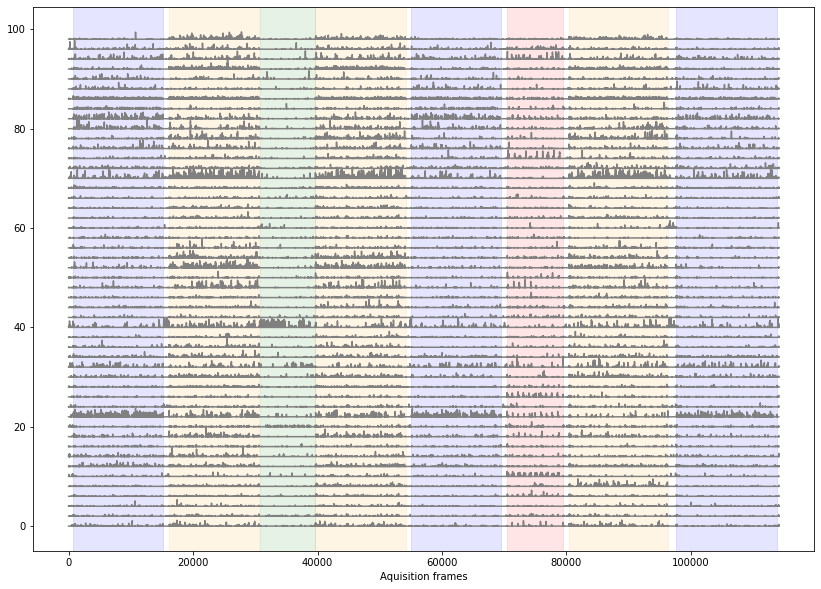

In [40]:
fig = plt.figure(figsize=(14,10))
for i in range(50):
    plt.plot(events[i,:]+(i*2), color='gray')
    
#Add the running speed - we'll offset this below the traces
stim_epoch
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)
        
plt.xlabel("Aquisition frames")

In [ ]:
natural_scene_table = data_set.get_stimulus_table('natural_scenes')

In [ ]:
natural_scene_table.head()

In [ ]:
natural_scene_table.end - natural_scene_table.start

In [ ]:
natural_scene_template = data_set.get_stimulus_template('natural_scenes')

In [ ]:
natural_scene_template.shape

In [ ]:
scene_number = 76
plt.imshow(natural_scene_template[scene_number,:,:], cmap='gray')

In [ ]:
fig = plt.figure(figsize=(10,8))
for i in range(50):
    plt.plot(events[i,:]+(i*2), color='gray')
    
#shade traces with the time of each presentation of the above scene
stim_subset = natural_scene_table[natural_scene_table.frame==scene_number]
for j in range(len(stim_subset)):
    plt.axvspan(xmin=stim_subset.start.iloc[j], xmax=stim_subset.end.iloc[j], color='red', alpha=0.4)

In [50]:
events.shape[0]

283

In [51]:
plt.imshow(cell_mat,vmax=1,interpolation='nearest',aspect='auto')
plt.colorbar()

NameError: name 'cell_mat' is not defined

In [ ]:
plt.plot(dff[1-5,:])

In [48]:
# # create a pandas DataFrame to store the mean response of the neuron in each trial
# stim_table = data_set.get_stimulus_table('natural_scenes')
# response = pd.DataFrame((session_id)
#         columns=('events', 'trial_response'), 
#         index=stim_table.index.values
# ) 
# # store orientation
# response['events'] = stim_table.events

# # store mean trial response
# for ind,row_stim in stim_table.iterrows():
#     # mean events during the grating presentation
#     response.loc[ind, 'trial_response'] = dff_trace[int(row_stim.start):int(row_stim.end)].mean()

# response.head()

SyntaxError: invalid syntax (<ipython-input-48-86ab8aa1b0ff>, line 4)